# Tercer punto. Ajuste de curvas
**Bancarrotas** (3.33 puntos). Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [16]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [17]:
y = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
x = np.arange(8,22)

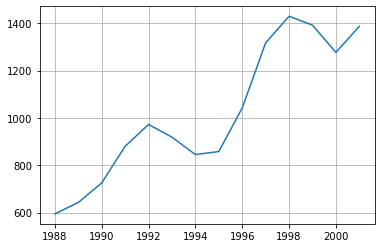

In [18]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste las bancarrotas con polinomios de grado 1, 3 y 5. Muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (2.3 puntos).
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.5 puntos).
3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predecirlo para el año 2011. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.5 puntos).

## SOLUCIÓN
### 1. 

In [19]:
# Se crea una lista en donde se contendrán todas las soluciones
soluciones = []
soluciones

[]

In [20]:
# Se obtiene el modelo polinomial
def f(x,beta):
    n = len(beta) - 1 #Orden del polinomio
    X = np.array([x**i for i in range(n+1)]) # Vector de potencias de la variable 'x' 
    return beta@X

In [21]:
#Función objetivo
def objetivo(beta,x,y):
    n = len(beta) -1
    X = np.array([x**i for i in range(n+1)])
    f = beta@X
    return np.sum((y-f)**2)

In [22]:
N = 5
for n in range(N):
    beta0 = np.random.rand(n+2) #Se  obtienen valores aleatorios para 'beta'
    soluciones.append(opt.minimize(objetivo,beta0,args = (x,y)))

In [23]:
soluciones[0]

      fun: 155674.762813826
 hess_inv: array([[ 0.50948424, -0.03222869],
       [-0.03222869,  0.00219258]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 6
     njev: 24
   status: 0
  success: True
        x: array([89.05156678, 64.21467452])

In [24]:
soluciones[2]

      fun: 152011.49483306467
 hess_inv: array([[ 1.01021359e-01, -1.58292162e-05,  1.64362740e-05,
        -1.82903728e-05],
       [-1.58292162e-05,  7.94524561e-08, -5.43962733e-08,
         7.22117933e-09],
       [ 1.64362740e-05, -5.43962733e-08,  4.16109380e-08,
        -6.70851055e-09],
       [-1.82903728e-05,  7.22117933e-09, -6.70851055e-09,
         5.27955428e-09]])
      jac: array([0.        , 0.00195312, 0.        , 0.00390625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 10
     njev: 92
   status: 2
  success: False
        x: array([ 9.40372436e+02, -1.30635745e+02,  1.40788935e+01, -3.23488023e-01])

In [25]:
soluciones[4]

      fun: 107150.37075884393
 hess_inv: array([[ 3.00665873e+02, -1.10631685e+02,  1.46669326e+01,
        -8.70217246e-01,  2.25220972e-02, -1.86885013e-04],
       [-1.10631685e+02,  5.25288984e+01, -8.82972283e+00,
         6.80564355e-01, -2.45647431e-02,  3.36786334e-04],
       [ 1.46669326e+01, -8.82972283e+00,  1.71364845e+00,
        -1.47348266e-01,  5.84158816e-03, -8.72794273e-05],
       [-8.70217246e-01,  6.80564355e-01, -1.47348266e-01,
         1.35559632e-02, -5.64855946e-04,  8.78529628e-06],
       [ 2.25220972e-02, -2.45647431e-02,  5.84158816e-03,
        -5.64855946e-04,  2.43385102e-05, -3.88259369e-07],
       [-1.86885013e-04,  3.36786334e-04, -8.72794273e-05,
         8.78529628e-06, -3.88259369e-07,  6.30899974e-09]])
      jac: array([-5.68457031e+00, -2.51289062e+01, -4.84316406e+01,  1.14020703e+03,
        2.76426660e+04,  6.40223521e+05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 453
      nit: 13
     njev: 6

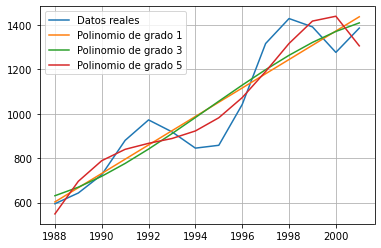

In [26]:
plt.plot(x+1980,y, label = 'Datos reales') #Gráfica de los datos documentados
for n in range(N):
    if n%2 == 0: # Condición para obtener sólo los polinomios de grado impar
        plt.plot(x+1980,f(x,soluciones[n].x), label = 'Polinomio de grado ' + str(n+1))
plt.grid()
plt.legend()

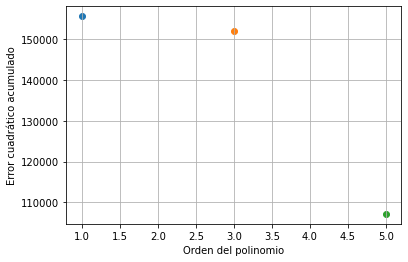

In [27]:
for n in range(N):
    if n%2 == 0: # Condición para obtener sólo los polinomios de grado impar
        plt.scatter(n+1,soluciones[n].fun)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

De acuerdo a la gráfica de los ajustes de los polinomios y a la de los errores, se obtiene que el **polinomio que mejor se ajusta es el de grado 5**, debido a que tiene un error menor y la gráfica es más similar de manera visual a la obtenida con los datos reales.

### 2.

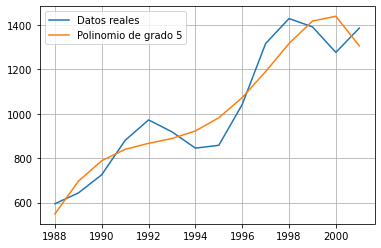

In [28]:
# Gráfica de los datos documentados y el polinomio que mejor se ajusta
plt.plot(x+1980,y, label = 'Datos reales')
plt.plot(x+1980,f(x,soluciones[4].x), label = 'Polinomio de grado ' + str(5))
plt.grid()
plt.legend()

### 3.

In [29]:
#Interpolación para aproximar el número de bancarrotas a mediados del año 1998
f(1998.5-1980,soluciones[4].x)

1373.7454773702339

In [30]:
#Extrapolación para aproximar el número de bancarrotas en el año 2011
f(2011-1980,soluciones[4].x)

-47318.168748625205

In [31]:
soluciones[4]

      fun: 107150.37075884393
 hess_inv: array([[ 3.00665873e+02, -1.10631685e+02,  1.46669326e+01,
        -8.70217246e-01,  2.25220972e-02, -1.86885013e-04],
       [-1.10631685e+02,  5.25288984e+01, -8.82972283e+00,
         6.80564355e-01, -2.45647431e-02,  3.36786334e-04],
       [ 1.46669326e+01, -8.82972283e+00,  1.71364845e+00,
        -1.47348266e-01,  5.84158816e-03, -8.72794273e-05],
       [-8.70217246e-01,  6.80564355e-01, -1.47348266e-01,
         1.35559632e-02, -5.64855946e-04,  8.78529628e-06],
       [ 2.25220972e-02, -2.45647431e-02,  5.84158816e-03,
        -5.64855946e-04,  2.43385102e-05, -3.88259369e-07],
       [-1.86885013e-04,  3.36786334e-04, -8.72794273e-05,
         8.78529628e-06, -3.88259369e-07,  6.30899974e-09]])
      jac: array([-5.68457031e+00, -2.51289062e+01, -4.84316406e+01,  1.14020703e+03,
        2.76426660e+04,  6.40223521e+05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 453
      nit: 13
     njev: 6

Se puede observar como la **interpolación** para aproximar el *número de bancarrotas a mediados del año 1998* es **aceptable** ya que se encuentra dentro del rango de valores de número de bancarrotas que fueron registradas entre 1998 y 1999, por lo tanto se pude decir que **la interpolación fue éxitosa**.

Sin embargo, a la hora de realizar la **extrapolación** para aproximar el número de bancarrotas que ocurrirán en el año 2011, **la función nos arroja un resultado negativo**. Probablemente, esto ocurre debido al hecho que el polinomio que mejor se ajusta, al final tiene una tendencia a bajar. Por lo tanto se puede decir que **la extrapolación no fue exitosa**.